In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
net=cv2.dnn.readNet('/home/philipp/darknet/yolov3_custom_last.weights','/home/philipp/darknet/cfg/yolov3_custom.cfg')



In [3]:
#Creating the 
classes=[]
with open('/home/philipp/darknet/data/obj_custom.names','r') as f:
    classes=[line.strip() for line in f.readlines()]

In [4]:
layer_names=net.getLayerNames()
outputlayers=[layer_names[i[0]-1] for  i in net.getUnconnectedOutLayers()]

In [5]:
outputlayers

['yolo_82', 'yolo_94', 'yolo_106']

In [6]:
img=cv2.imread('/home/philipp/darknet/data/hat_phone.jpg')

In [7]:
height,width,channels=img.shape

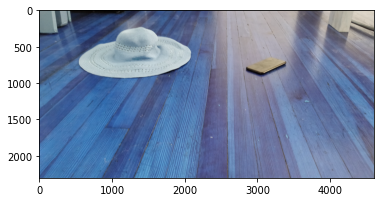

In [8]:
plt.imshow(img)


In [9]:
blob=cv2.dnn.blobFromImage(img,0.00392,(416,416),(0,0,0),True, crop=False)

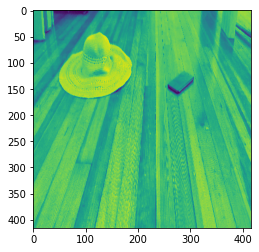

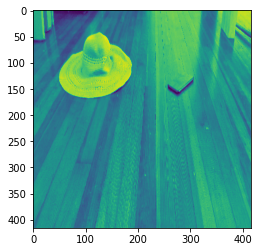

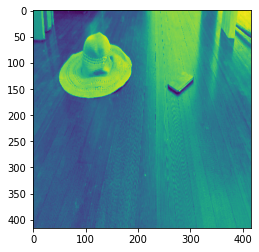

In [10]:
for b in blob:
    for n, imgblob in enumerate(b):
        plt.imshow(imgblob)
        plt.show()

In [11]:
net.setInput(blob)

In [12]:
outs=net.forward(outputlayers)

In [13]:
test=[]
class_ids=[]
confidences=[]
boxes=[]
for out in outs:
    for detection in out:
        scores=detection[5:]
        class_id=np.argmax(scores)
        confidence=scores[class_id]
        if confidence>0.5:
            #object detected
            center_x=int(detection[0]*width)
            center_y=int(detection[1]*height)
            w=int(detection[2]*width)
            h=int(detection[3]*height)

            x=int(center_x-w/2)
            y=int(center_y-h/2)
            
                        
            #test=cv2.circle(img,(center_x,center_y),10,(0,255,0),2)
            #test=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
            
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)
            


In [14]:
indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.4,0.5)
print(len(indexes))
print(len(boxes))

2
2


In [15]:

colors=[]
for i in range(80):
    ind_color=(random.randint(0,255),random.randint(0,255),random.randint(0,255))
    colors.append(ind_color)

In [16]:
test=[]
font=cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        print("found")
        x,y,w,h=boxes[i]
        label=str(classes[class_ids[i]])
        color=colors[class_ids[i]]
        #test=cv2.rectangle(img,(x,y),(x+w,y+h),color,2)
        test=cv2.rectangle(img,(x,y),(x+w,y+h),(255,255,255),5)
        test=cv2.putText(test,label,(x,y+30),font,10,(255,255,255),5)
       
        
test=cv2.circle(test,(int(width/2),int(height/2)),50,(100,255,100),1)

found
found


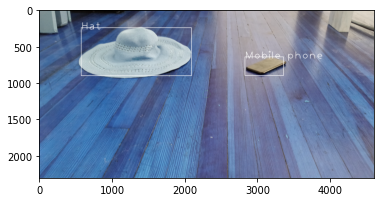

In [17]:
plt.imshow(test)